# **Trabalho Final - Introdução à Ciência de Dados**
## Análise Exploratória do Dataset FireWatch 2024: Wildfires and Drought in Brazil

Disponível em: https://www.kaggle.com/datasets/mayaravalliero/fire-watch-brazil-2024/data

Alunos:

Lélio Marcos Rangel Cunha

Rafael Comitre Garcia Conrado



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Leitura dos dados e concatenação em um único DataFrame



In [ ]:
df1 = pd.read_csv("Dataset_FireWatch_Brazil_Q1_2024.csv")
df2 = pd.read_csv("Dataset_FireWatch_Brazil_Q2_2024.csv")
df3 = pd.read_csv("Dataset_FireWatch_Brazil_Q3_2024.csv")
df4 = pd.read_csv("Dataset_FireWatch_Brazil_Q4_2024.csv")

#Concatenando os DataFrames em um só
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
# remove rows to have 164340 rows

In [ ]:
df

,data,municipio,estado,bioma,avg_numero_dias_sem_chuva,avg_precipitacao,avg_risco_fogo,avg_frp
0,2024-01-01,VALE DO ANARI,RONDÔNIA,Amazônia,0.0,1698.00,0.0,13.00
1,2024-01-01,SÃO GABRIEL DA CACHOEIRA,AMAZONAS,Amazônia,0.2,206.80,0.0,81.40
2,2024-01-01,MANAQUIRI,AMAZONAS,Amazônia,0.0,60.00,0.0,27.00
3,2024-01-01,JUTAÍ,AMAZONAS,Amazônia,2.0,776.00,0.0,211.00
4,2024-01-01,AUTAZES,AMAZONAS,Amazônia,0.0,2.22,0.0,97.67
...,...,...,...,...,...,...,...,...
228771,2024-11-08,PORTO ALEGRE DO NORTE,MATO GROSSO,Cerrado,0.0,1199.00,0.0,57.00
228772,2024-11-08,BAÍA FORMOSA,RIO GRANDE DO NORTE,Mata Atlântica,0.0,4.00,1.0,87.50
228773,2024-11-08,PILAR,ALAGOAS,Mata Atlântica,69.0,0.00,1.0,70.00
228774,2024-11-08,IBICOARA,BAHIA,Caatinga,5.0,0.00,95.0,NaN


In [ ]:
df.describe()

,avg_numero_dias_sem_chuva,avg_precipitacao,avg_risco_fogo,avg_frp
count,228776.000000,2.287760e+05,228776.000000,228683.000000
mean,22.951352,1.812471e+03,226.182103,134.449388
std,31.951781,1.981731e+04,972.766989,219.871157
min,0.000000,0.000000e+00,-999.000000,0.000000
25%,2.000000,0.000000e+00,4.000000,31.500000
50%,7.330000,0.000000e+00,78.000000,62.300000
75%,31.000000,0.000000e+00,100.000000,128.735000
max,120.000000,1.324675e+06,9900.000000,9300.570000


# Análise prévia e limpeza dos dados

Verificando se existem atributos nulos

In [ ]:
df.isnull().sum()

,0
data,0
municipio,0
estado,0
bioma,1
avg_numero_dias_sem_chuva,0
avg_precipitacao,0
avg_risco_fogo,0
avg_frp,93


Nota-se que existe um valor faltante em 'bioma':

In [ ]:
#Determinando qual o bioma faltante
df[df['bioma'].isnull()]

,data,municipio,estado,bioma,avg_numero_dias_sem_chuva,avg_precipitacao,avg_risco_fogo,avg_frp
19130,2024-01-30,LAGOA DOS PATOS,RIO GRANDE DO SUL,NaN,0.0,0.0,0.0,0.0


Por meio de uma análise manual da região, determina-se que o bioma predominante é Pampa

In [ ]:
df.loc[df['bioma'].isnull(), 'bioma'] = 'Pampa'

Para os valores faltantes de 'avg_frp', utilizamos a imputação com estratégia de média

In [ ]:
df['avg_frp'].fillna(df['avg_frp'].median(), inplace=True)

<ipython-input-10-31b5916e01cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_frp'].fillna(df['avg_frp'].median(), inplace=True)


In [ ]:
df.isnull().sum()

,0
data,0
municipio,0
estado,0
bioma,0
avg_numero_dias_sem_chuva,0
avg_precipitacao,0
avg_risco_fogo,0
avg_frp,0


Verificou-se agora que não há mais nenhum atributo com valor faltante.

# Verificação de Outliers

<Axes: >

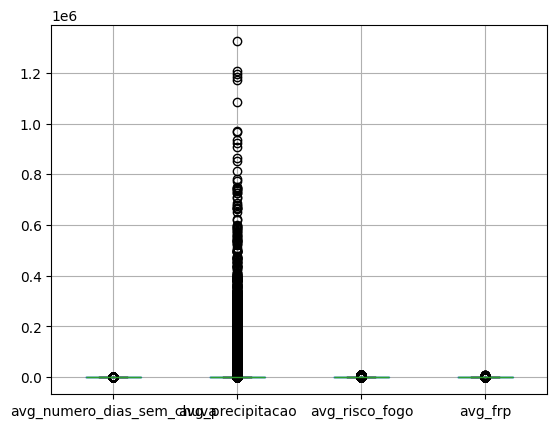

In [ ]:
df.boxplot()

In [ ]:
atributos_numericos = ['avg_numero_dias_sem_chuva', 'avg_risco_fogo', 'avg_frp']

Removemos os outliers por meio da estratégia do IQR:

In [ ]:
Q1 = df[atributos_numericos].quantile(0.25)
Q3 = df[atributos_numericos].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

<Axes: >

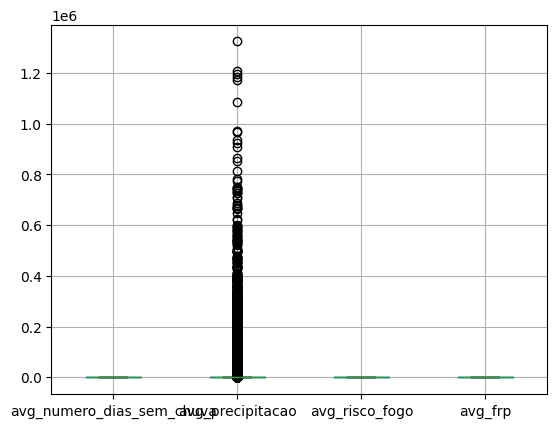

In [ ]:
df_new = df.copy()

for i in atributos_numericos:
    df_new[i] = np.where(df[i] >= limite_superior[i], limite_superior[i], df_new[i])
    df_new[i] = np.where(df[i] <= limite_inferior[i], limite_inferior[i], df_new[i])


df_new.boxplot()

# Análise Exploratória

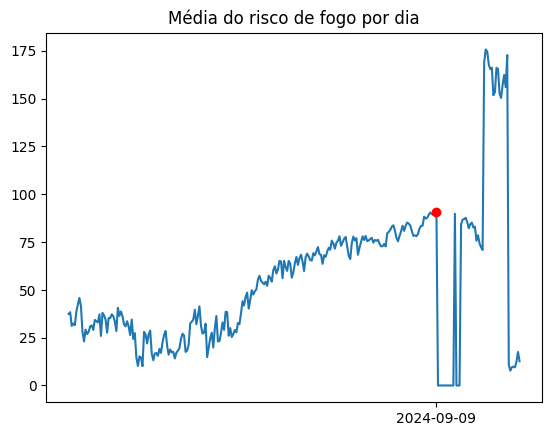

In [ ]:
df_group_data = df_new.groupby('data')['avg_risco_fogo'].mean().reset_index()

plt.title('Média do risco de fogo por dia')
plt.plot(df_group_data['data'], df_group_data['avg_risco_fogo'])
plt.plot('2024-09-09', df_new.groupby('data')['avg_risco_fogo'].mean()['2024-09-09'], '--ro')
plt.xticks(['2024-09-09'], visible=True, rotation="horizontal")
plt.show()

Percebe-se que existe uma quantidade grande de dados que não fazem sentido a partir do dia 2024-09-09, mesmo após a eliminação de outliers. Provavelmente esses erros têm origem em algum problema na coleta dos dados. Removeremos as linhas com esses valores.

In [ ]:
df_new = df_new[df_new['data'] <= '2024-09-09']

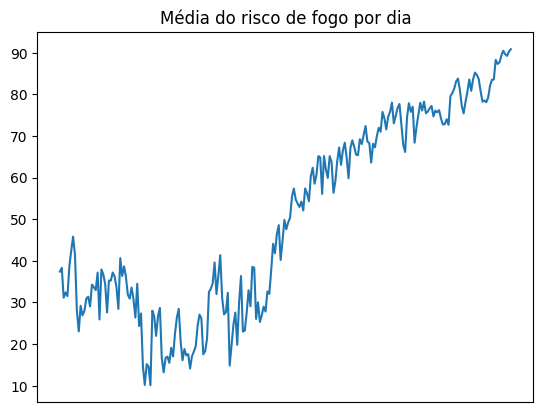

In [ ]:
plt.title('Média do risco de fogo por dia')
plt.plot(df_new.groupby('data')['avg_risco_fogo'].mean())
plt.xticks([], visible=True, rotation="horizontal")
plt.show()

Matriz de Correlação:

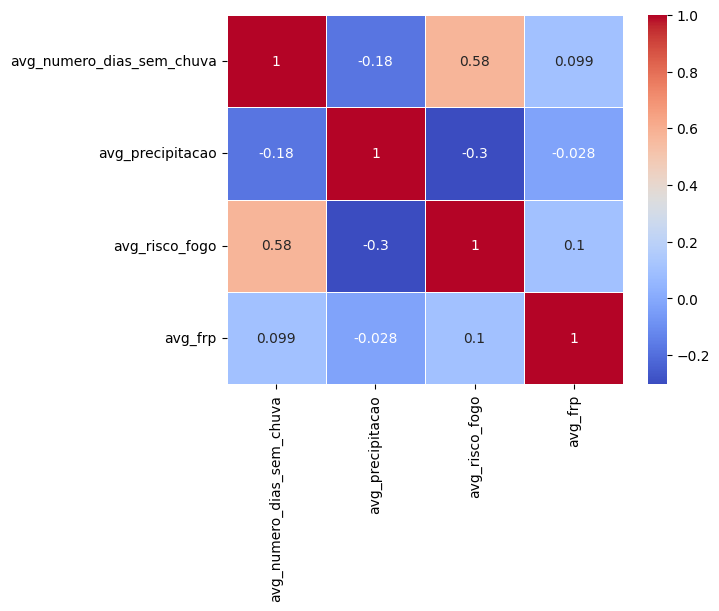

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dataplot = sns.heatmap(df_new.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Determinando quais biomas possuem maior risco de queimadas:

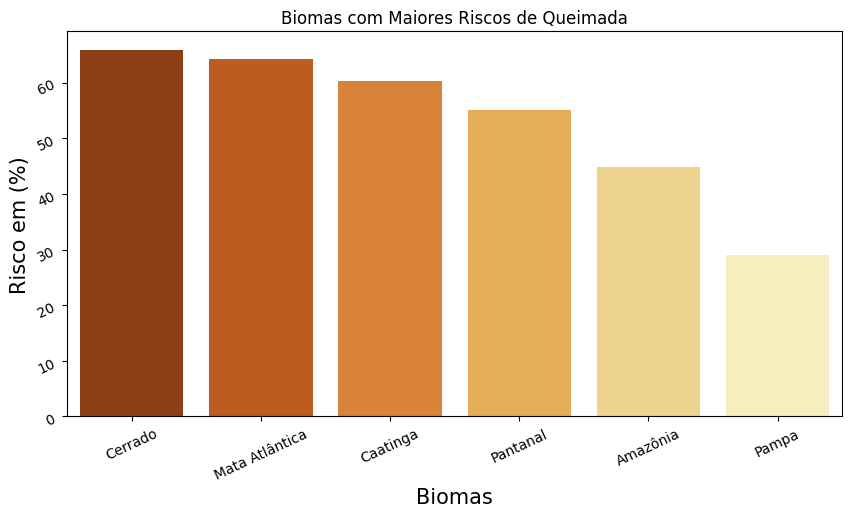

In [ ]:
biomas_maior_risco = df_new.groupby('bioma')['avg_risco_fogo'].mean().sort_values(ascending=False).reset_index()
biomas_maior_risco

plt.figure(figsize=(10, 5))
sns.barplot(x='bioma', hue='bioma', y='avg_risco_fogo', data=biomas_maior_risco, palette='YlOrBr_r',)
plt.title('Biomas com Maiores Riscos de Queimada')
plt.xlabel('Biomas', fontsize=15)
plt.xticks(rotation=25, fontsize=10)
plt.yticks(rotation=25, fontsize=10)
plt.ylabel('Risco em (%)', fontsize=15)
plt.show()

Avaliando quais biomas ficaram mais tempo sem chuva:

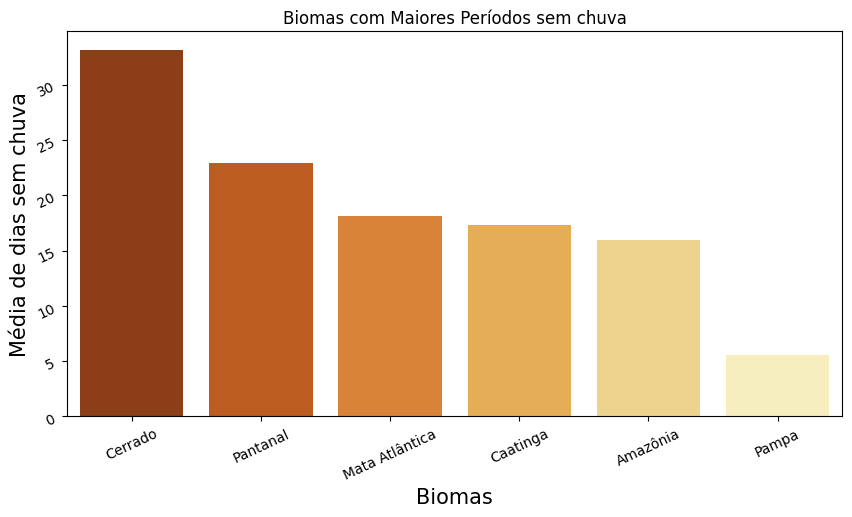

In [ ]:
biomas_sem_chuva = df_new.groupby('bioma')['avg_numero_dias_sem_chuva'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='bioma', hue='bioma', y='avg_numero_dias_sem_chuva', data=biomas_sem_chuva, palette='YlOrBr_r',)
plt.title('Biomas com Maiores Períodos sem chuva')
plt.xlabel('Biomas', fontsize=15)
plt.xticks(rotation=25, fontsize=10)
plt.yticks(rotation=25, fontsize=10)
plt.ylabel('Média de dias sem chuva', fontsize=15)
plt.show()

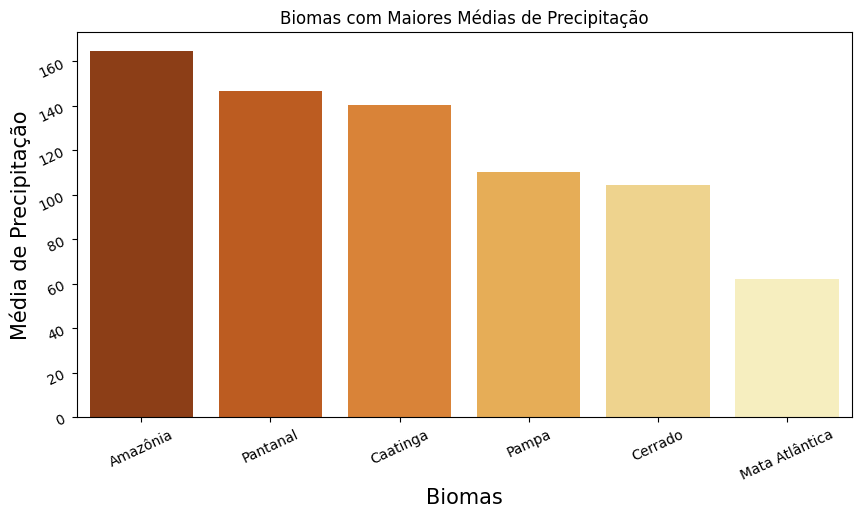

In [ ]:
biomas_sem_chuva = df_new.groupby('bioma')['avg_precipitacao'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='bioma', hue='bioma', y='avg_precipitacao', data=biomas_sem_chuva, palette='YlOrBr_r',)
plt.title('Biomas com Maiores Médias de Precipitação')
plt.xlabel('Biomas', fontsize=15)
plt.xticks(rotation=25, fontsize=10)
plt.yticks(rotation=25, fontsize=10)
plt.ylabel('Média de Precipitação', fontsize=15)
plt.show()

Avaliando quais estados possuem maior risco de queimadas:

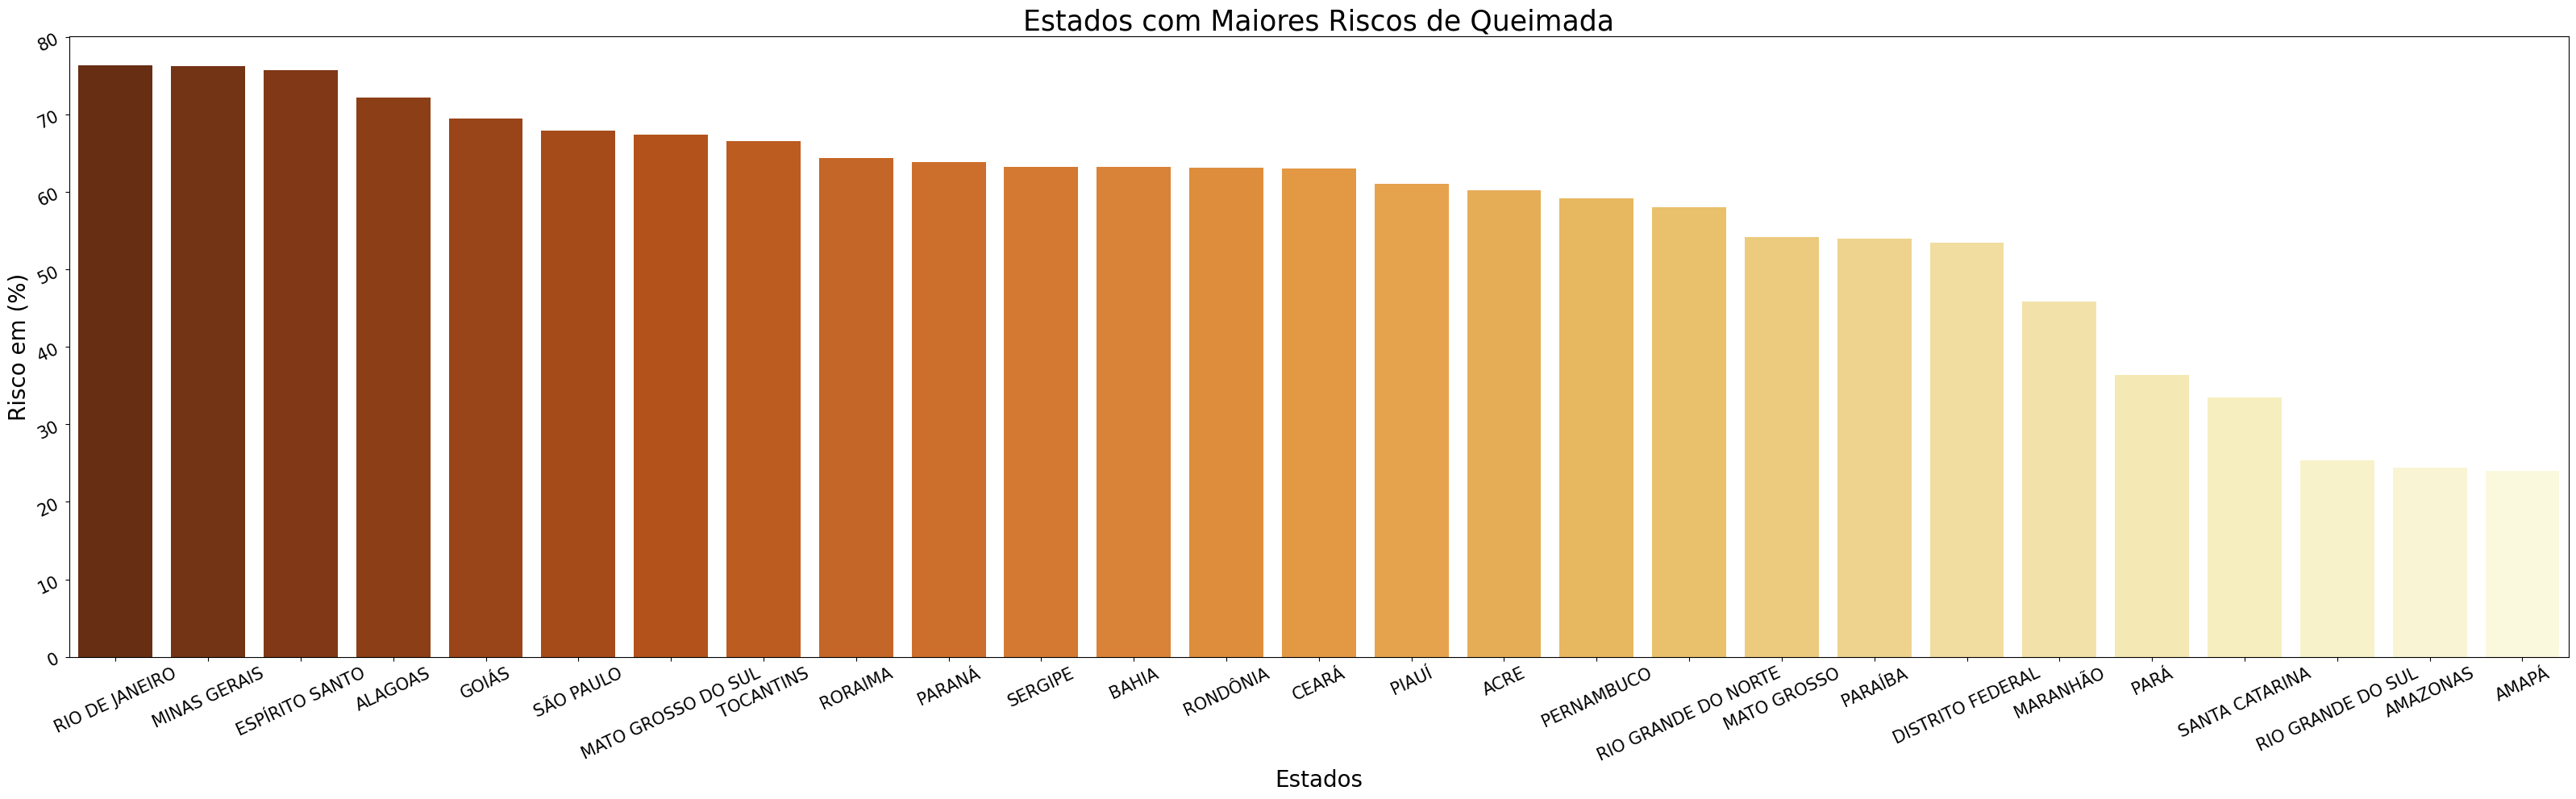

In [ ]:
estados_maior_risco = df_new.groupby('estado')['avg_risco_fogo'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(40, 10))
sns.barplot(x='estado', hue='estado', y='avg_risco_fogo', data=estados_maior_risco, palette='YlOrBr_r')
plt.title('Estados com Maiores Riscos de Queimada', fontsize=25)
plt.xlabel('Estados', fontsize=20)
plt.xticks(rotation=25, fontsize=15)
plt.yticks(rotation=25, fontsize=15)
plt.ylabel('Risco em (%)', fontsize=20)
plt.show()

Avaliando quais estados estão com os maiores períodos sem chuva:

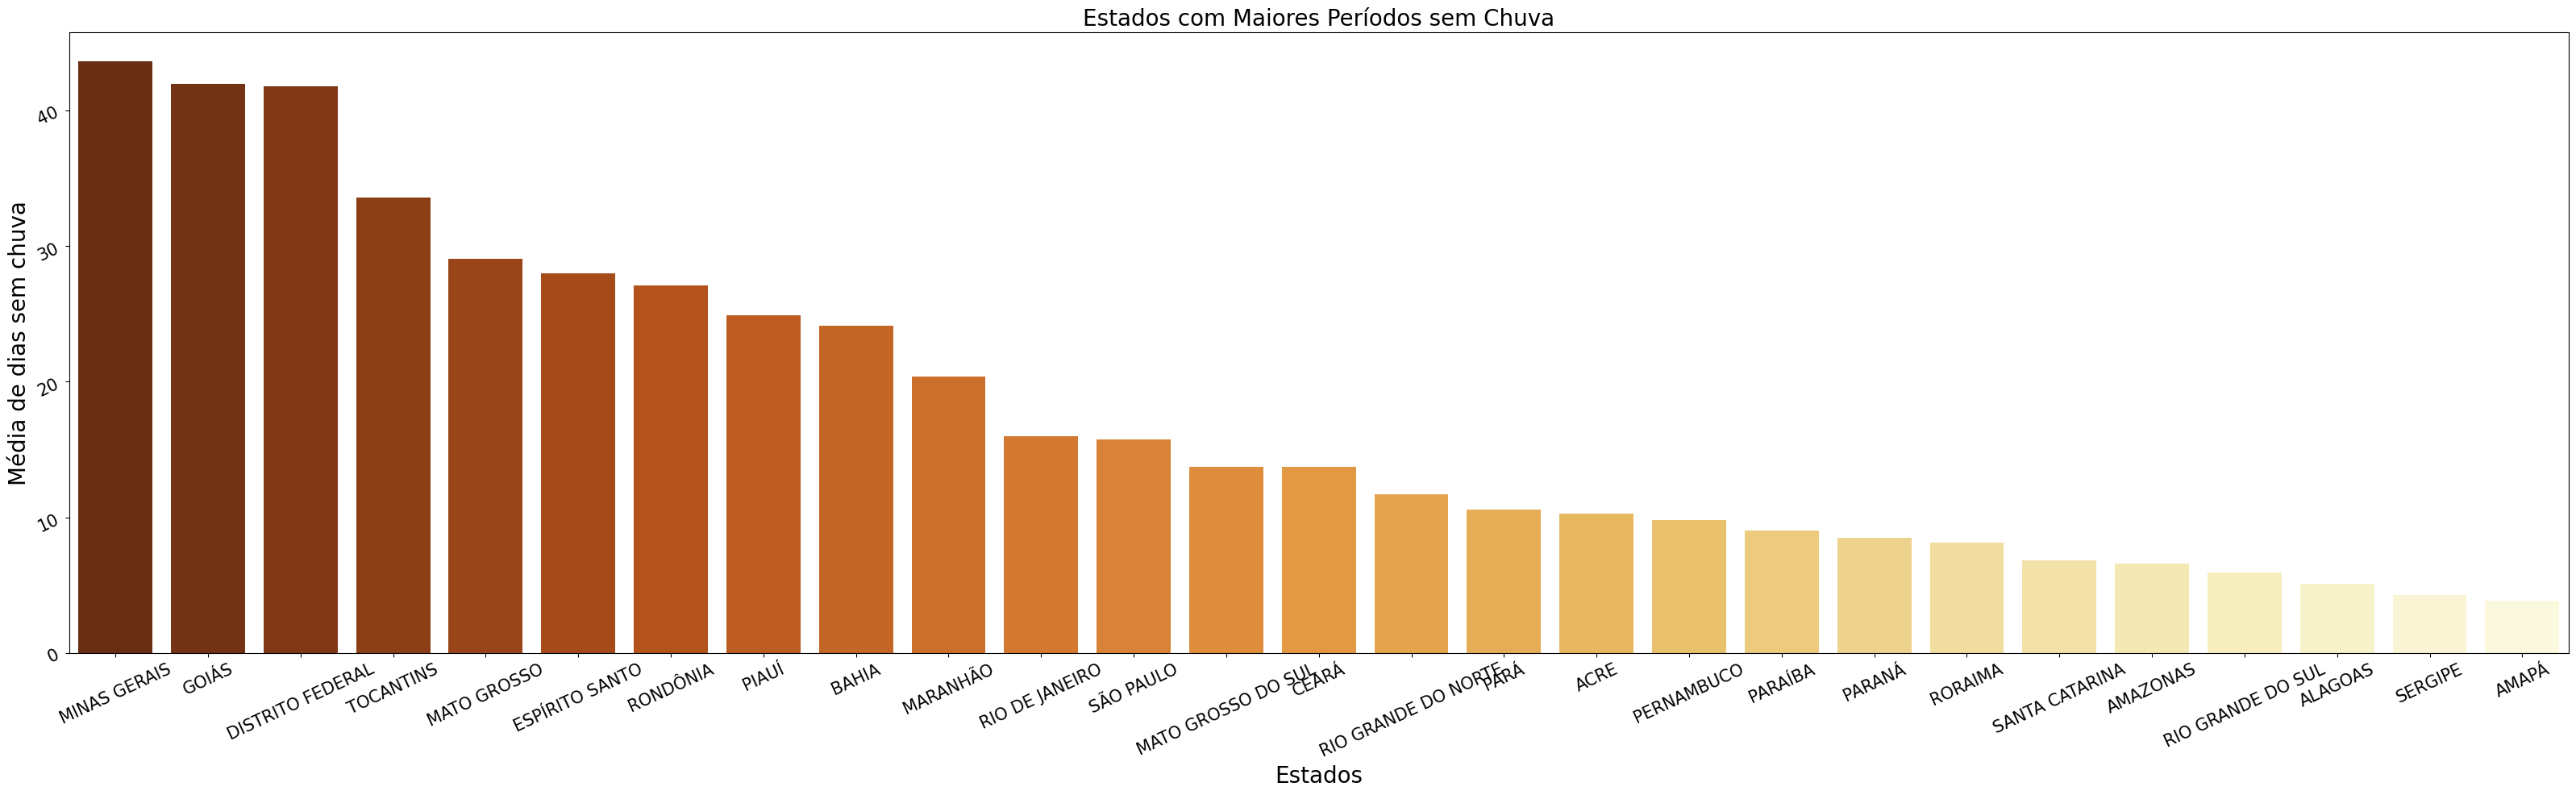

In [ ]:
estados_precipitacao = df_new.groupby('estado')['avg_numero_dias_sem_chuva'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(40, 10))
sns.barplot(x='estado', hue='estado', y='avg_numero_dias_sem_chuva', data=estados_precipitacao, palette='YlOrBr_r')
plt.title('Estados com Maiores Períodos sem Chuva', fontsize=20)
plt.xlabel('Estados', fontsize=20)
plt.xticks(rotation=25, fontsize=15)
plt.yticks(rotation=25, fontsize=15)
plt.ylabel('Média de dias sem chuva', fontsize=20)
plt.show()

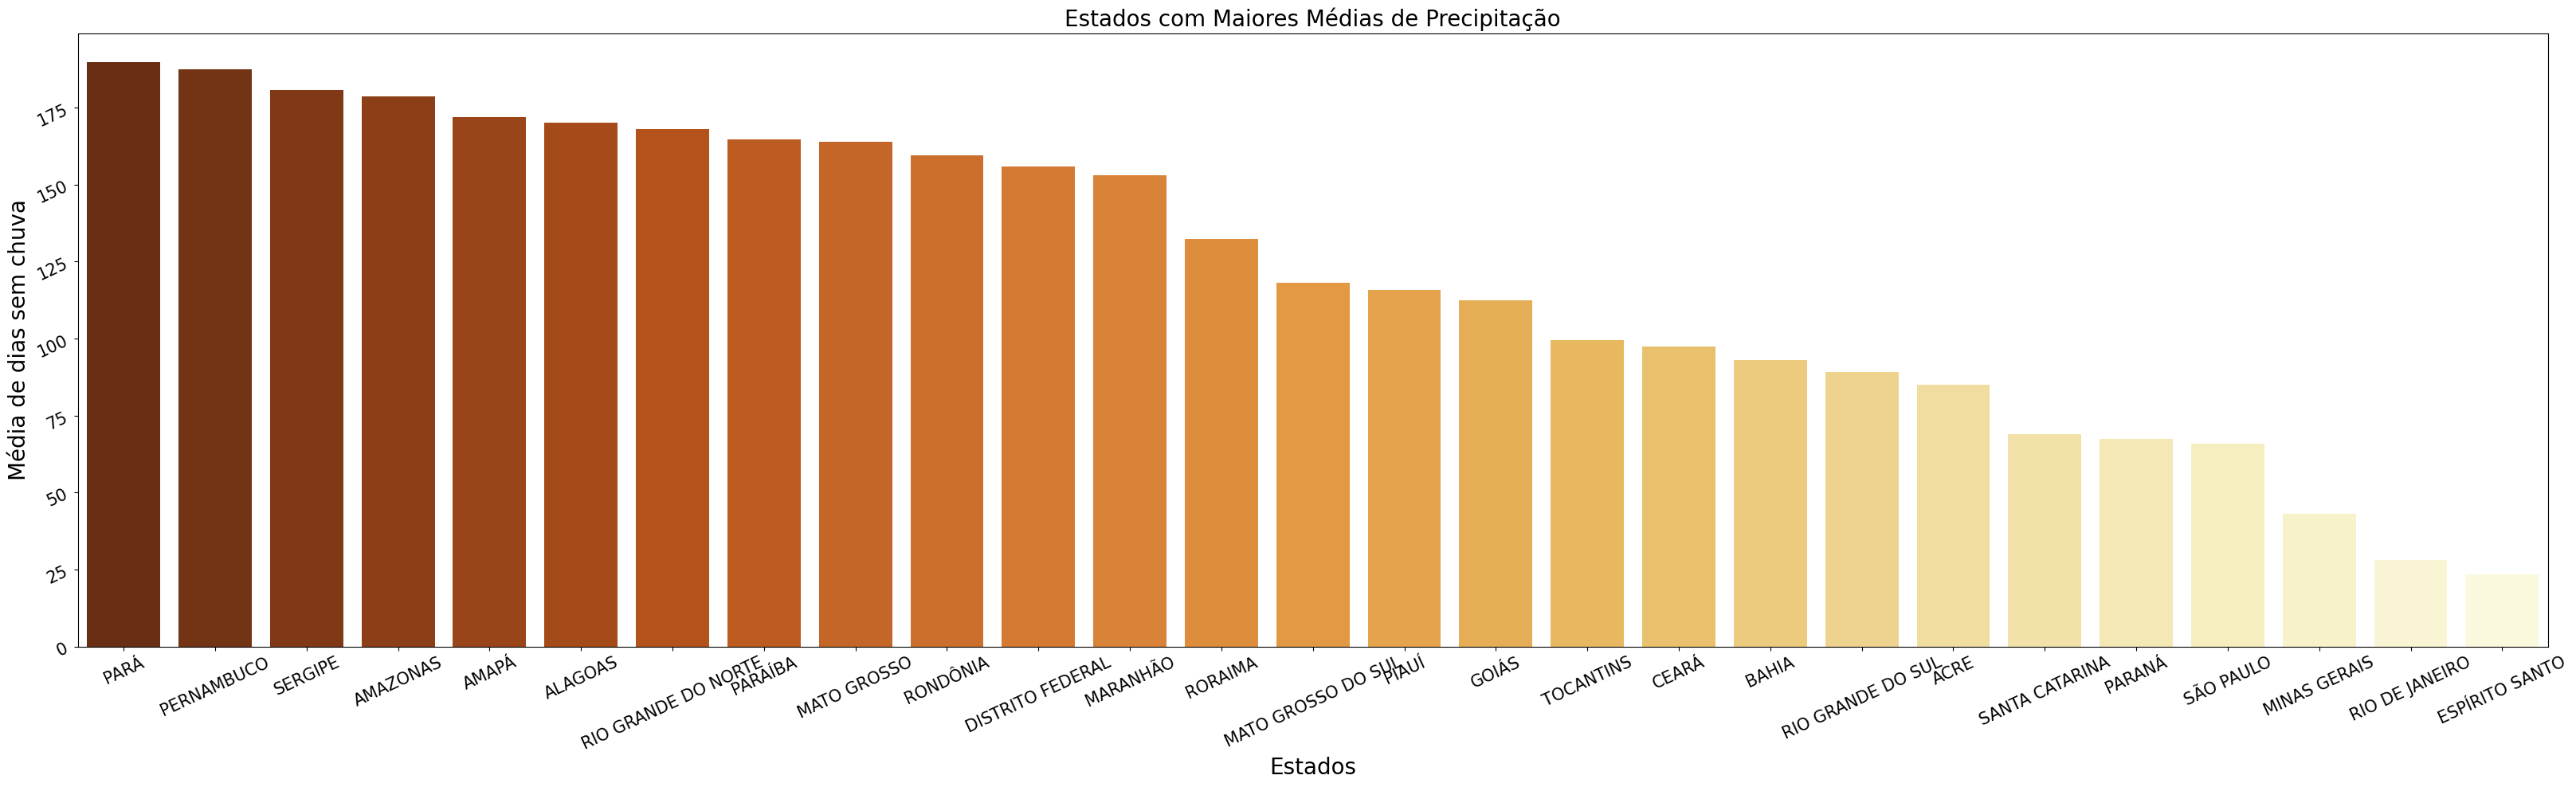

In [ ]:
estados_precipitacao_2 = df_new.groupby('estado')['avg_precipitacao'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(40, 10))
sns.barplot(x='estado', hue='estado', y='avg_precipitacao', data=estados_precipitacao_2, palette='YlOrBr_r')
plt.title('Estados com Maiores Médias de Precipitação', fontsize=20)
plt.xlabel('Estados', fontsize=20)
plt.xticks(rotation=25, fontsize=15)
plt.yticks(rotation=25, fontsize=15)
plt.ylabel('Média de dias sem chuva', fontsize=20)
plt.show()

# Tentativa de previsão

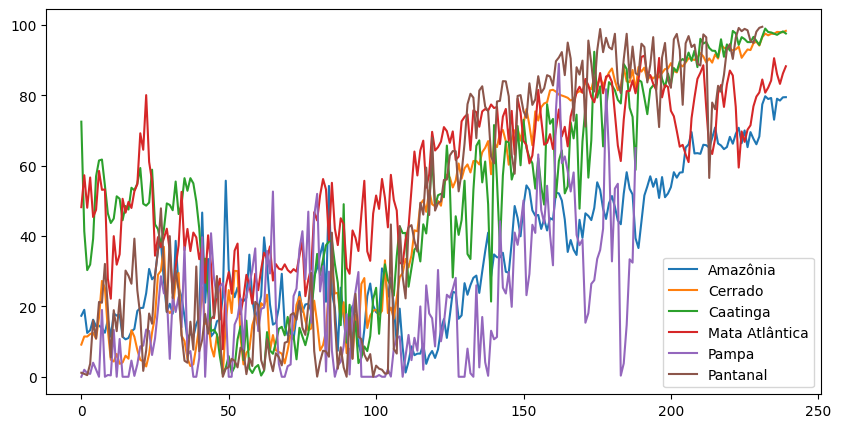

In [ ]:
# Criaremos um DF para cada bioma
biomas = df_new['bioma'].unique()
df_biomas = {}
for bioma in biomas:
  df_biomas[bioma] = df_new[df_new['bioma'] == bioma]
  df_biomas[bioma] = df_biomas[bioma].drop(columns=['bioma', 'municipio', 'estado'])
  df_biomas[bioma] = df_biomas[bioma].groupby('data').mean().reset_index()

plt.figure(figsize=(10, 5))
for bioma in biomas:
  plt.plot(df_biomas[bioma].index, df_biomas[bioma]['avg_risco_fogo'], label=bioma)
plt.legend()

In [ ]:
df_biomas['Pantanal']

,data,avg_numero_dias_sem_chuva,avg_precipitacao,avg_risco_fogo,avg_frp
0,2024-01-01,0.700000,1563.298000,1.140000,112.035000
1,2024-01-02,1.000000,215.500000,0.835000,155.877500
2,2024-01-03,0.107500,1704.760000,0.465000,218.070000
3,2024-01-04,0.498333,102.795000,3.706667,209.616667
4,2024-01-05,0.998750,151.998750,16.033750,227.662500
...,...,...,...,...,...
227,2024-09-05,49.062500,12.707500,95.445000,71.825833
228,2024-09-06,47.157778,24.818889,94.912222,72.421667
229,2024-09-07,45.702222,3.832222,98.110000,224.986111
230,2024-09-08,48.827692,0.000000,99.199231,187.425769


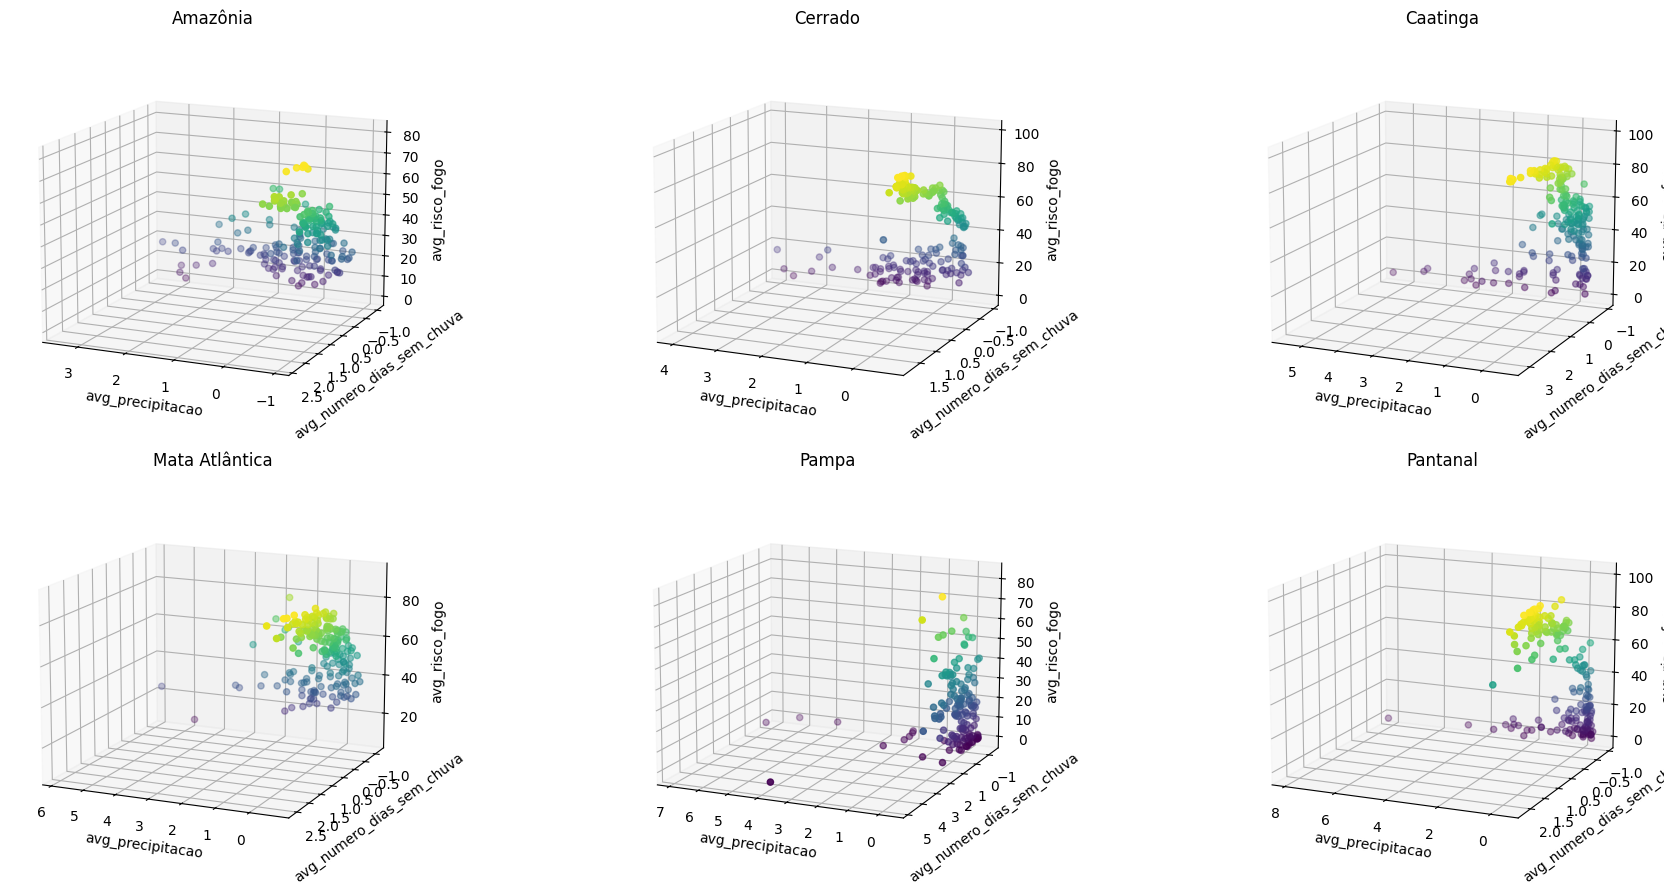

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

def preprocess(data):
  y = data['avg_risco_fogo']

  X = data.drop(columns=['avg_risco_fogo', 'data', 'avg_frp'])

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
  ])

  transformar = ColumnTransformer([
    ('num', num_pipeline, ['avg_precipitacao', 'avg_numero_dias_sem_chuva']),
  ])

  transformar.set_output(transform='pandas')

  X_modf_train = transformar.fit_transform(X_train)
  X_modf_test = transformar.transform(X_test)

  return X_modf_train, X_modf_test, y_train, y_test

#plot train in 3d plot
fig, axs = plt.subplots(2, 3, figsize=(20, 9), subplot_kw=dict(projection="3d"))
for i, bioma in enumerate(biomas):
  axs[i//3, i%3].view_init(elev=14, azim=114)
  X_train, X_test, y_train, y_test = preprocess(df_biomas[bioma])
  axs[i//3, i%3].scatter(X_train['num__avg_precipitacao'], X_train['num__avg_numero_dias_sem_chuva'], y_train, c=y_train, cmap='viridis')
  axs[i//3, i%3].set_title(f'{bioma}')
  axs[i//3, i%3].set_xlabel('avg_precipitacao')
  axs[i//3, i%3].set_ylabel('avg_numero_dias_sem_chuva')
  axs[i//3, i%3].set_zlabel('avg_risco_fogo')

fig.tight_layout()
plt.show()

In [ ]:
# make linear regression with sikitlearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm, tree
from sklearn.neural_network import MLPRegressor

def regression(data, model):
  models = {'lr': LinearRegression(), 'mlp': MLPRegressor(max_iter=7000)}

  X_train, X_test, y_train, y_test = preprocess(data)

  regr = models[model]
  regr.fit(X_train, y_train)

  y_pred = regr.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  return X_test, y_test, y_pred, mse, r2, regr

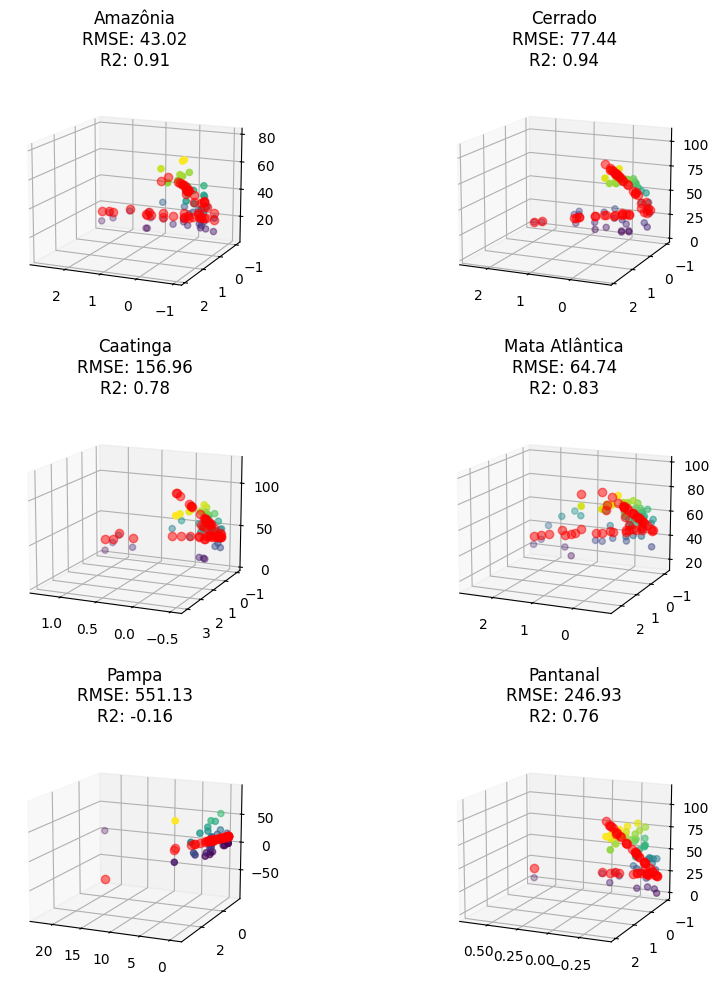

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10), subplot_kw=dict(projection="3d"))
for i, bioma in enumerate(biomas):
  X_test, y_test, y_pred, mse, r2, regr = regression(df_biomas[bioma], 'lr')
  axs[i//2, i%2].view_init(elev=14, azim=114)

  axs[i//2, i%2].scatter(X_test['num__avg_precipitacao'], X_test['num__avg_numero_dias_sem_chuva'], y_test, c=y_test, cmap='viridis')
  axs[i//2, i%2].plot(X_test['num__avg_precipitacao'], X_test['num__avg_numero_dias_sem_chuva'], y_pred, color='r', zorder=15, linestyle='none', marker='o', alpha=0.5)
  #axs[i//2, i%2].plot_surface(X_test['num__avg_precipitacao'], X_test['num__avg_numero_dias_sem_chuva'], y_pred, c='red')
  axs[i//2, i%2].set_title(f'{bioma}\nRMSE: {mse:.2f}\nR2: {r2:.2f}')

fig.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

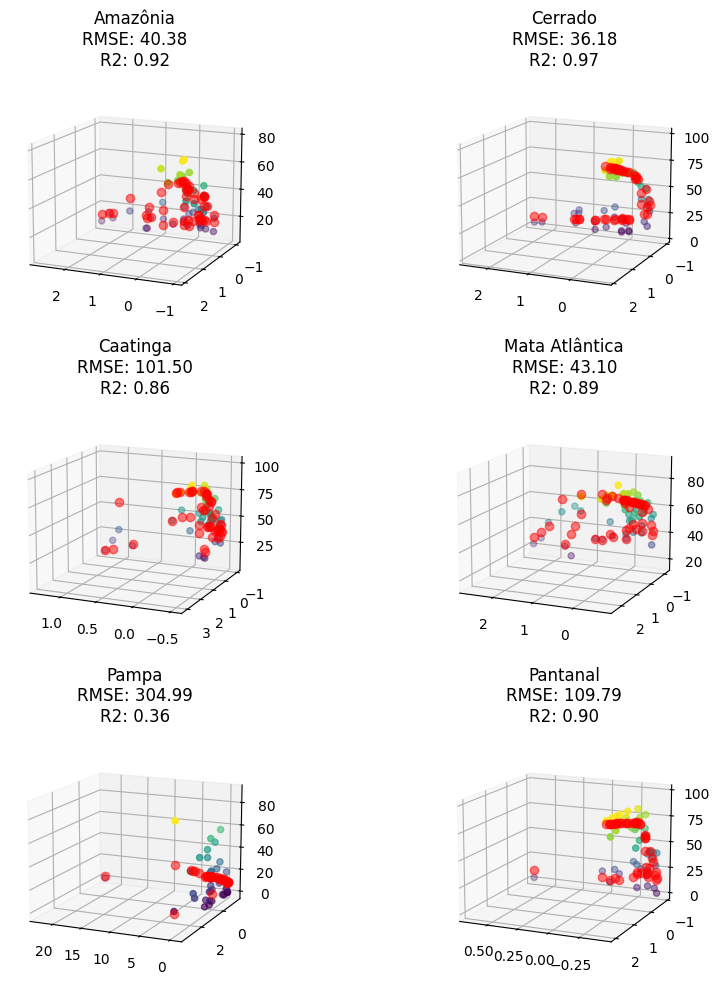

In [ ]:
#Imprime número de camadas e nós do MPL regressor


fig, axs = plt.subplots(3, 2, figsize=(10, 10), subplot_kw=dict(projection="3d"))
for i, bioma in enumerate(biomas):
  X_test, y_test, y_pred, mse, r2, regr = regression(df_biomas[bioma], 'mlp')

  axs[i//2, i%2].view_init(elev=14, azim=114)

  axs[i//2, i%2].scatter(X_test['num__avg_precipitacao'], X_test['num__avg_numero_dias_sem_chuva'], y_test, c=y_test, cmap='viridis')
  axs[i//2, i%2].plot(X_test['num__avg_precipitacao'], X_test['num__avg_numero_dias_sem_chuva'], y_pred, color='r', zorder=15, linestyle='none', marker='o', alpha=0.5)
  #axs[i//2, i%2].plot_surface(X_test['num__avg_precipitacao'], X_test['num__avg_numero_dias_sem_chuva'], y_pred, c='red')
  axs[i//2, i%2].set_title(f'{bioma}\nRMSE: {mse:.2f}\nR2: {r2:.2f}')

fig.tight_layout()
plt.show()